<a href="https://colab.research.google.com/github/samikris/physicsprojects/blob/main/Project5_Spins%26Configurations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

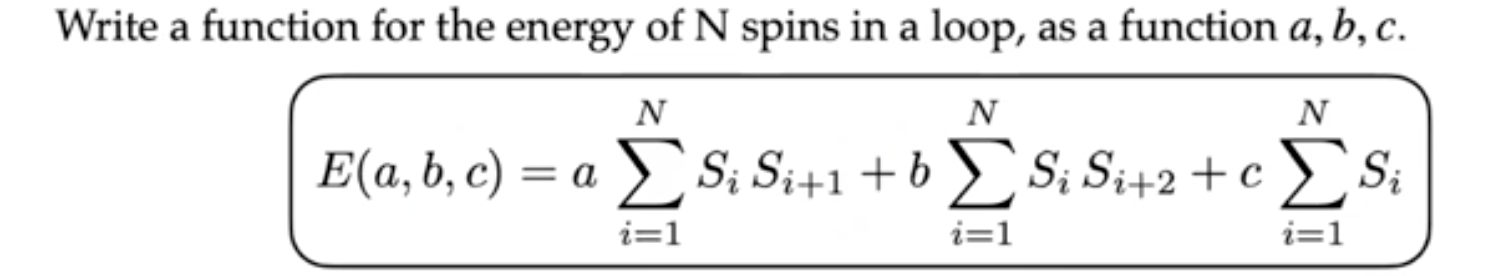

In [ ]:
def rotate_vec(vec0): #function used to rotate an arrray to the left, used to simulate rotation of particle configuration
  N = len(vec0)
  tmp = np.zeros(N) #creates array with given size filled with zeros

  tmp[0:N-1] = vec0[1:N]
  tmp[N-1] = vec0[0]

  return tmp

def Eising(St, a, b, c):
  Stp1 = rotate_vec(St) #rotates spins by 1
  Stp2 = rotate_vec(Stp1) #rotates spins by 2

  #nearest neighbor calculations
  dEa = a * sum(St * Stp1)
  dEb = b * sum(St * Stp2)
  dEc = c * sum(St)

  return dEa + dEb + dEc




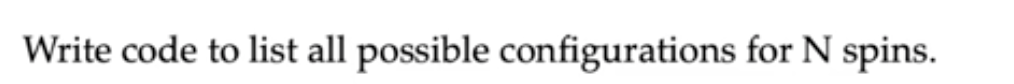

In [ ]:
def ising_list(N): #if there are N spins, there are 2^N possible states
  TOT = [[1],[-1]]

  for n in range(N-1):
    Nt = len(TOT)
    for j0 in range(Nt):
      state1 = TOT[j0][:]
      state2 = TOT[j0][:]

      state1.append(1) #either spin up or spin down
      state2.append(-1)

      TOT[j0] = state1 #why append vs this?
      TOT.append(state2)

    return TOT



In [ ]:
N = 10
a = -5
b = 1
c = -0.01

#in general, observe how nmpy is used on ARRAYs for sami --> vectorized operations?
states  = ising_list(N)
state_energies = [] #empty list that calculated energies will be added to

for e in range(2 ** N):
  energy = Eising(states[e][:], a, b, c) #uses function i wrote above
  state_energies.append(energy)
#first you need to get all the configurations and their energies
#then, to get the degeneracy, you need to see if they are all unique or the same, and whether energy is conserved or not
#for ground state energy, it is the lowest energy

ground_state = np.min(state_energies)
print(ground_state)
counter = 0

for i in range(len(state_energies)):
  if state_energies[i] == ground_state:
    print(states[i])
    counter = counter + 1 #counter variable to track the number of non-unique energies

print(counter)



IndexError: list index out of range